#Text Mining in Healthcare Data

> Submitted By:
  - Bisheshwor Neupane
  - Gaurab Shrestha 
  - Sajan Mahat



Healthcare practitioners generate a large amount of data in their routine clinical practice, which is then saved in a variety of different sources and is typically in textual form. Over the last few decades, there has been a widespread use of medical databases and health care information systems. However, the data is usually stored in textual form. They are mainly unstructured and lack normalization and gathering insights from those data is one of the major challenges in computational medicine. This extraction of useful data from the textual data is termed as text data mining or simply text mining. The unstructured input data is preprocessed, transformed into a structured model and represented in a suitable way to the users which will 
discover the unknown, useful and high quality information as output. This can 
be useful for the analysis purposes and several studies also propose that they can be used to discover and alert healthcare professionals about potential epidemics, drug safety and readmissions. Text mining gathers techniques from various fields like information retrieval, information extraction, natural language processing and artificial intelligence. With the rapidly changing data environment, healthcare organizations should also adapt to data driven approaches which will really be fruitful to this domain. To fulfill this purpose, various medical text analysis models are available in which SpaCy and Med7 are some of the most popular ones. The models allow processing biomedical, scientific or clinical text. 


In [1]:
#connnecting google drive to colab to access textual data
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/My Drive/HealthInformatics

/content/gdrive/My Drive/HealthInformatics


The data that we have used in this project is called "smokers_surrogate_train_all_version2".

**Source**: DBMI Data Portal of Harvard University | DBMI Data Portal | Unstructured notes from the Research Patient Data Registry at Partners Healthcare (originally developed during the i2b2 project).

In [3]:
text_path = "/content/gdrive/My Drive/HealthInformatics/smokers_surrogate_train_all_version2.xml"

In [4]:
# reading the data through the file and extracting the data inside the <TEXT> tag.
from bs4 import BeautifulSoup
with open(text_path, 'r') as f:
    data = f.read()

bs_data = BeautifulSoup(data, 'xml')
b_text = bs_data.find_all('TEXT')

In [5]:
b_text

[<TEXT>
 977146916
 HLGMC
 2878891
 022690
 01/27/1997 12:00:00 AM
 CARCINOMA OF THE COLON .
 Unsigned
 DIS
 Report Status :
 Unsigned
 Please do not go above this box important format codes are contained .
 DISCHARGE SUMMARY
 ARF32 FA
 DISCHARGE SUMMARY NAME :
 GIRRESNET , DIEDREO A
 UNIT NUMBER :
 075-71-01
 ADMISSION DATE :
 01/27/1997
 DISCHARGE DATE :
 01/31/1997
 PRINCIPAL DIAGNOSIS :
 Carcinoma of the colon .
 ASSOCIATED DIAGNOSIS :
 Urinary tract infection , and cirrhosis of the liver .
 HISTORY OF PRESENT ILLNESS :
 The patient is an 80-year-old male , who had a history of colon cancer in the past , resected approximately ten years prior to admission , history of heavy alcohol use , who presented with a two week history of poor PO intake , weight loss , and was noted to have acute on chronic Hepatitis by chemistries and question of pyelonephritis .
 He lived alone but was driven to the hospital by his son because of reported worsening and general care and deconditioning .
 Eme

In [6]:
#converting data to string
temp = []
for ele in b_text:
    temp.append(str(ele))

In [7]:
#splitting data with '\n' new lines.
memory = []
for ele in temp:
    memory.append(ele.split("\n"))

In [8]:
memory

[['<TEXT>',
  '977146916',
  'HLGMC',
  '2878891',
  '022690',
  '01/27/1997 12:00:00 AM',
  'CARCINOMA OF THE COLON .',
  'Unsigned',
  'DIS',
  'Report Status :',
  'Unsigned',
  'Please do not go above this box important format codes are contained .',
  'DISCHARGE SUMMARY',
  'ARF32 FA',
  'DISCHARGE SUMMARY NAME :',
  'GIRRESNET , DIEDREO A',
  'UNIT NUMBER :',
  '075-71-01',
  'ADMISSION DATE :',
  '01/27/1997',
  'DISCHARGE DATE :',
  '01/31/1997',
  'PRINCIPAL DIAGNOSIS :',
  'Carcinoma of the colon .',
  'ASSOCIATED DIAGNOSIS :',
  'Urinary tract infection , and cirrhosis of the liver .',
  'HISTORY OF PRESENT ILLNESS :',
  'The patient is an 80-year-old male , who had a history of colon cancer in the past , resected approximately ten years prior to admission , history of heavy alcohol use , who presented with a two week history of poor PO intake , weight loss , and was noted to have acute on chronic Hepatitis by chemistries and question of pyelonephritis .',
  'He lived alone 

In [9]:
#getting the values in the left of semicolon and their corresponding data
bag_ofwords = []
attr_val = []

for i in range(len(memory)):
    attr_cache = {}
    for j in range(len(memory[i])):
        cache_str = ''
        if (memory[i][j] != '') & (memory[i][j][-1] == ':'):
            bag_ofwords.append(memory[i][j].replace(' :', ''))
            k = j+1
            try:
                while (k<len(memory[i])) & (memory[i][k][-1] != ':'):
                    cache_str = cache_str + memory[i][k]
                    k = k + 1
            except:
                continue
            attr_cache[memory[i][j].replace(' :', '')] = cache_str
    attr_val.append(attr_cache)

In [10]:
bag_ofwords

['Report Status',
 'DISCHARGE SUMMARY NAME',
 'UNIT NUMBER',
 'ADMISSION DATE',
 'DISCHARGE DATE',
 'PRINCIPAL DIAGNOSIS',
 'ASSOCIATED DIAGNOSIS',
 'HISTORY OF PRESENT ILLNESS',
 'PAST MEDICAL HISTORY',
 'MEDICATIONS ON ADMISSION',
 'ALLERGIES',
 'FAMILY HISTORY',
 'SOCIAL HISTORY',
 'PHYSICAL EXAMINATION',
 'bloodpressure',
 'head , eyes , ears , nose and throat',
 'Cardiac',
 'LABORATORY DATA',
 'HOSPITAL COURSE AND TREATMENT',
 'TR',
 'DD',
 'TD',
 'Pcc',
 'Admission Date',
 'Report Status',
 'Discharge Date',
 'PRINCIPAL DIAGNOSIS',
 'OTHER DIAGNOSIS',
 'HISTORY OF PRESENT ILLNESS',
 'PAST MEDICAL HISTORY',
 'ALLERGIES',
 'MEDICATIONS',
 'FAMILY HISTORY',
 'SOCIAL HISTORY',
 'HABITS',
 'PHYSICAL EXAMINATION',
 'VITAL SIGNS',
 'HEENT',
 'NECK',
 'LUNGS',
 'CARDIOVASCULAR',
 'ABDOMEN',
 'EXTREMITIES',
 'DIAGNOSTIC STUDIES',
 'HOSPITAL COURSE',
 'DISPOSITION',
 'DISCHARGE MEDICATIONS',
 'Dictated By',
 'Attending',
 'Batch',
 'D',
 'T',
 'CC',
 'Report Status',
 'DISCHARGE SUMMARY NA

In [11]:
#a sample data dictionary appended to attr_val 
attr_cache

{'Admission Date': '11/27/2003',
 'Report Status': '',
 'Discharge Date': '11/28/2003****** DISCHARGE ORDERS ******MEEDBELB , LIND E869-08-73-5 B09',
 'Room': '23Q-929',
 'Service': 'CAR',
 'DISCHARGE PATIENT ON': '11/28/03 AT 02:00 PMCONTINGENT UPONNot Applicable',
 'WILL D / C ORDER BE USED AS THE D / C SUMMARY': 'YES',
 'Attending': 'KOTESKISMANHOUT , AYAN , M.D.',
 'CODE STATUS': 'Full code',
 'DISPOSITION': 'Home',
 'DISCHARGE MEDICATIONS': 'COLACE ( DOCUSATE SODIUM ) 100 MG PO BID FENTANYL ( PATCH ) 25 MCG / HR TP Q72H',
 'Alert overridden': 'Override added on 11/27/03 by CRAMPKOTE , LINE , M.D.POSSIBLE ALLERGY ( OR SENSITIVITY ) to NARCOTICS ,',
 'PHENYLPIPERIDINE POTENTIALLY SERIOUS INTERACTION': 'CITALOPRAM HYDROBROMIDE and FENTANYL CITRATE',
 'Reason for override': 'takes at home w / o problem',
 'MG PO QD HOLD IF': 'sbp &lt; 100Food / Drug Interaction InstructionGive on an empty stomach ( give 1hr before or 2hr after food ) PLAVIX ( CLOPIDOGREL ) 75 MG PO QD CELEXA ( CITALOP

In [12]:
#common features manually observed which are the basis of further text mining
common_features = ["PRINCIPAL DIAGNOSIS","ASSOCIATED DIAGNOSIS","HISTORY OF PRESENT ILLNESS",
            "PAST MEDICAL HISTORY","PHYSICAL EXAMINATION", "LABORATORY DATA"
            ]

In [13]:
#appending the dictionaries to a list with data of above selected features
temp = []
indx = []
for idx,ele0 in enumerate(attr_val):
    new_data = {}
    try:
        for ele in common_features:
            new_data[ele] = ele0[ele]
        temp.append(new_data)
        indx.append(idx)
    except:
        continue

In [14]:
temp

[{'PRINCIPAL DIAGNOSIS': 'Carcinoma of the colon .',
  'ASSOCIATED DIAGNOSIS': 'Urinary tract infection , and cirrhosis of the liver .',
  'HISTORY OF PRESENT ILLNESS': 'The patient is an 80-year-old male , who had a history of colon cancer in the past , resected approximately ten years prior to admission , history of heavy alcohol use , who presented with a two week history of poor PO intake , weight loss , and was noted to have acute on chronic Hepatitis by chemistries and question of pyelonephritis .He lived alone but was driven to the hospital by his son because of reported worsening and general care and deconditioning .Emergency Department course ; he was evaluated in the emergency room , found to be severely cachectic and jaundiced .He was given a liter of normal saline , along with thiamine , folate .An abdominal ultrasound was performed showing no stones .Chest x-ray revealed clear lungs and then he was admitted to Team C for management .',
  'PAST MEDICAL HISTORY': 'Cancer , t

In [15]:
len(temp)

36

In [16]:
indx

[0,
 6,
 12,
 13,
 21,
 31,
 32,
 45,
 46,
 49,
 70,
 76,
 79,
 80,
 81,
 89,
 97,
 104,
 116,
 117,
 132,
 147,
 156,
 191,
 192,
 202,
 206,
 207,
 208,
 211,
 212,
 213,
 217,
 252,
 290,
 296]

## Pandas
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. It is used to analyze data using dataframes structure.




In [17]:
import pandas as pd
dict_2df = pd.DataFrame.from_dict(temp)

In [18]:
new_text = []
for idx in range(len(indx)):
    new_text.append(b_text[indx[idx]])

In [19]:
text_df = pd.DataFrame(new_text,columns=["Text"])
dict_2df = dict_2df.merge(text_df,left_index=True, right_index=True)
dict_2df

PRINCIPAL DIAGNOSIS  \
0                            Carcinoma of the colon .   
1                            Small cell lung cancer .   
2                  Non-Q wave myocardial infarction .   
3                       Acute myocardial infarction .   
4                             Cryptogenic cirrhosis .   
5                        Gastric outlet obstruction .   
6        Status post inferior myocardial infarction .   
7                                   Pulmonary edema .   
8                                   Pulmonary edema .   
9                 Right thyroid papillary carcinoma .   
10            Right occipital , cerebral infarction .   
11                 Rule out for myocardial infarction   
12                                  Gastric carcinoma   
13                         restrictive pericarditis .   
14                          coronary artery disease .   
15         Self inflicted gunshot wound to the head .   
16                         congestive heart failure .   
17                      Acute myocardial infarction .   
18                       Cerebral vascular accident .   
19                                      dehydration .   
20                              Atrial fibrillation .   
21                  Esophageal carcinoma-metastatic .   
22                         colon cancer , Duke 's D .   
23                          ventricular tachycardia .   
24             Acute inferior myocardial infarction .   
25                          coronary artery disease .   
26                            Recurrent liposarcoma .   
27                  osteoarthritis of the right hip .   
28                  Post-infarction angina pectoris .   
29                Bilateral hydroureteral nephrosis .   
30            III-c papillary serous ovarian cancer .   
31  Stage 3C papillary serous carcinoma of the ova...   
32                           Dilated cardiomyopathy .   
33                          mixed mesodermal cancer .   
34              Right capsular putamenal hemorrhage .   
35                 Left incarcerated femoral hernia .   

                                 ASSOCIATED DIAGNOSIS  \
0   Urinary tract infection , and cirrhosis of the...   
1   Chronic obstructive pulmonary disease , left u...   
2   Status post anterior myocardial infarction in ...   
3                      Lower gastrointestinal bleed .   
4                                 Variceal bleeding .   
5   1. Obstructive jaundice .2. metastatic adenoca...   
6   Heart failure secondary to volume overload .Hy...   
7   Congestive heart failure , coronary artery dis...   
8   Congestive heart failure , coronary artery dis...   
9   1. Pulmonary and right iliac bone metastases ....   
10  Old inferior wall myocardial infarction in 1984 .   
11  1 ) aortic insufficiency ; 2 ) Parkinson 's Di...   
12  hypothyroidism following near total thyroidect...   
13  coronary artery disease , prior myocardial inf...   
14  congestive heart failure , atrial fibrillation...   
15                    hypertension , poor dentition .   
16  1. schizotypal personality disorder ,2. diabet...   
17  1. Coronary artery disease ,2. unstable angina...   
18  Congestive heart failure , pre-renal azotemia ...   
19                                         dementia .   
20  History of multinodular goiter ; history of hy...   
21  Lymphangetic pulmonary carcinomatosis , dyspnea .   
22              seizure disorder , post-head trauma .   
23           coronary artery disease , hypertension .   
24                               Hypertension .Gout .   
25  coronary atherosclerosis , myocardial infarcti...   
26  Cardiomyopathy , history of arrhythmia , prost...   
27  asthma ; bladder stones with recurrent urinary...   
28  chronic renal insufficiency , congestive heart...   
29                        Metastatic ovarian cancer .   
30  history of deep venous thrombosis .KITRI CURB ...   
31  Patient was admitted to the GYN Oncology SErvi...   
32  Interstitial lung disease , mitral regu

## Scispacy
Scispacy is an open-source software library for advanced Natural Language Processing, written in the programming language Python. It is a python package containing spaCy models for processing biomedical, scientific or clinical text. 

**What are Spacy models?**

Spacy models are the efficient and configurable pre-trained pipelines which are used in Natural Language Processing on large volumes of text at high speed.   

In [20]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz (120.2 MB)


In [21]:
#using "en_ner_bc5cdr_md" model available within the spacy models
df = dict_2df
import spacy
import scispacy
nlp_obj = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [22]:
#component names available to use under spacy
nlp_obj.component_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

In [23]:
#we will be using 'ner' which stands for 'named entity recognition'.
nlp_obj.get_pipe("ner").labels

('CHEMICAL', 'DISEASE')

In [24]:
#testing with one sample
x=df['Text'][0]
dataofx= nlp_obj(x)

In [25]:
#displacy is used to visualize the text mining in the data
from spacy import displacy
displacy.render(dataofx, style='ent', jupyter = True)

In [26]:
#Function to extract all the disease
def diseaseExtract(text):
  dataofx = nlp_obj(text)
  results = [ent.text for ent in dataofx.ents if ent.label_ == 'DISEASE']
  return results

In [27]:
#applying the function to overall data and adding a column 'Disease' in the dataframe
df['Disease'] = df['Text'].apply(lambda x:diseaseExtract(x))

In [28]:
#Function to extract all the chemicals
def chemicalExtract(text):
  dataofx = nlp_obj(text)
  results = [ent.text for ent in dataofx.ents if ent.label_ == 'CHEMICAL']
  return results

In [29]:
#applying the function to overall data and adding a column 'Chemicals' in the dataframe
df['Chemicals'] = df['Text'].apply(lambda x:chemicalExtract(x))

In [30]:
#Wordcloud is basically a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency.
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
df['Disease'].to_list()

[['Carcinoma of the colon',
  'tract infection',
  'cirrhosis of the liver',
  'colon cancer',
  'weight loss',
  'Hepatitis',
  'pyelonephritis',
  'cachectic and jaundiced',
  'Cancer',
  'cachectic , jaundiced man .',
  'throat',
  'ulcers',
  'elevated liver function',
  'Hepatitis',
  'liver failure',
  'coagulopathy',
  'shortness of breath',
  'pulmonary edema',
  'TD'],
 ['Chronic obstructive pulmonary disease',
  'thrombosis',
  'chronic obstructive pulmonary disease',
  'shortness of breath',
  'shortness of breath',
  'chronic obstructive pulmonary disease',
  'hypercholesterolemia',
  'abdominal aortic aneurysm',
  'hypertension',
  'edema',
  'pleural effusion',
  'shortness of breath',
  'pneumonia',
  'swelling',
  'shortness of breath and weakness',
  'somnolent',
  'pulseless',
  'TD',
  'SHUFF'],
 ['WAVE',
  'myocardial infarction',
  'myocardial infarction',
  'hypertension',
  'diabetes mellitus',
  'myocardial infarction',
  'chest pain',
  'shortness of breath',
 

In [32]:
##Get most common disease for each category
def get_common_disease(x):
  disease_list = df['Disease'].tolist()
  disease_list = [i for j in disease_list for i in j]
  return disease_list

surgery_disease = get_common_disease('Surgery')

In [33]:
import matplotlib.pyplot as plt

##Function to plot the disease and chemical
from wordcloud import WordCloud
def plot_cloud(text):
  mywordcloud = WordCloud().generate(text)
  plt.imshow(mywordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

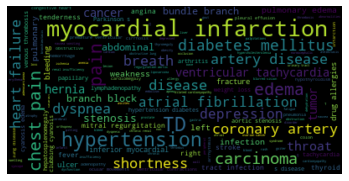

In [34]:
plot_cloud(' '.join(surgery_disease))

In [35]:
##Get most common chemicals for each category
def get_common_chemicals(x):
  chemical_list = df['Chemicals'].tolist()
  chemical_list = [i for j in chemical_list for i in j]
  return chemical_list

chemicals = get_common_chemicals('Chemicals')

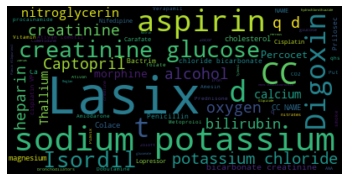

In [36]:
plot_cloud(' '.join(chemicals))

In [37]:
#using another model available in spacy called "en_ner_bionlp13cg_md"
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bionlp13cg_md-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bionlp13cg_md-0.5.1.tar.gz (120.2 MB)


In [38]:
#create new NLP object for another model that checks biological attributes
nlp_obj2 = spacy.load("en_ner_bionlp13cg_md")

In [39]:
nlp_obj2.component_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

In [40]:
#note that here are a lot more labels than previous model. So, this allows us to extract data related to cancer, cells, organs, tissues and many more.
nlp_obj2.get_pipe("ner").labels

('AMINO_ACID',
 'ANATOMICAL_SYSTEM',
 'CANCER',
 'CELL',
 'CELLULAR_COMPONENT',
 'DEVELOPING_ANATOMICAL_STRUCTURE',
 'GENE_OR_GENE_PRODUCT',
 'IMMATERIAL_ANATOMICAL_ENTITY',
 'MULTI_TISSUE_STRUCTURE',
 'ORGAN',
 'ORGANISM',
 'ORGANISM_SUBDIVISION',
 'ORGANISM_SUBSTANCE',
 'PATHOLOGICAL_FORMATION',
 'SIMPLE_CHEMICAL',
 'TISSUE')

In [41]:
dataofxobj2 = nlp_obj2(x)

In [42]:
#Extracting all the entities
for ent in dataofxobj2.ents:
  print(ent.text, ent.label_)

HLGMC CELL
01/27/1997 12:00:00 AM ORGANISM
FA SIMPLE_CHEMICAL
NAME SIMPLE_CHEMICAL
colon CANCER
liver ORGAN
patient ORGANISM
colon cancer CANCER
alcohol SIMPLE_CHEMICAL
PO SIMPLE_CHEMICAL
saline SIMPLE_CHEMICAL
thiamine SIMPLE_CHEMICAL
folate SIMPLE_CHEMICAL
abdominal ORGANISM_SUBDIVISION
stones PATHOLOGICAL_FORMATION
lungs ORGAN
Cancer CANCER
Folic acid SIMPLE_CHEMICAL
Drinks SIMPLE_CHEMICAL
head ORGANISM_SUBDIVISION
eyes ORGAN
ears ORGANISM_SUBDIVISION
nose ORGANISM_SUBDIVISION
gums ORGANISM_SUBDIVISION
lungs ORGAN
Cardiac MULTI_TISSUE_STRUCTURE
tender ORGAN
Liver edge TISSUE
abdominal wall MULTI_TISSUE_STRUCTURE
inguinal nodes MULTI_TISSUE_STRUCTURE
Rectal ORGAN
Skin ORGAN
BUN SIMPLE_CHEMICAL
creatinine SIMPLE_CHEMICAL
magnesium 1.2 SIMPLE_CHEMICAL
albumin GENE_OR_GENE_PRODUCT
liver ORGAN
bilirubin of 14 GENE_OR_GENE_PRODUCT
uric acid 11.4 GENE_OR_GENE_PRODUCT
alkaline phosphatase 173 SIMPLE_CHEMICAL
serum glutamic oxaloacetic transaminase 309 ORGANISM_SUBSTANCE
amylase GENE_OR_GENE

In [43]:
displacy.render(dataofxobj2, style='ent', jupyter = True)

In [44]:
#Function to extract all the organs 
def organExtract(text):
  dataofxobj2 = nlp_obj2(text)
  results = [ent.text for ent in dataofxobj2.ents if ent.label_ == 'ORGAN']
  return results

In [45]:
df['Organ'] = df['Text'].apply(lambda x:organExtract(x))

In [46]:
def get_common_organ(x):
  organ_list = df['Organ'].tolist()
  organ_list = [i for j in organ_list for i in j]
  return organ_list

organs = get_common_organ('Organ')

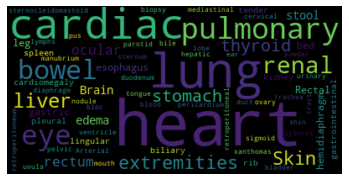

In [47]:
plot_cloud(' '.join(organs))

In [49]:
#Function to extract all the genes or gene-products 
def geneExtract(text):
  dataofxobj2 = nlp_obj2(text)
  results = [ent.text for ent in dataofxobj2.ents if ent.label_ == 'GENE_OR_GENE_PRODUCT']
  return results

In [50]:
df['Gene'] = df['Text'].apply(lambda x:geneExtract(x))

In [51]:
def get_common_gene(x):
  gene_list = df['Gene'].tolist()
  gene_list = [i for j in gene_list for i in j]
  return gene_list

genes = get_common_gene('Gene')

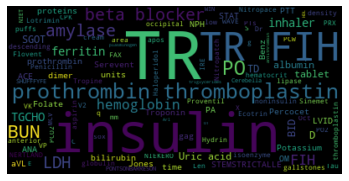

In [53]:
plot_cloud(' '.join(genes))

In [54]:
#saving the dataframe to a json file to dump into database later
df.to_json('datas.json')